# Gait Video Study 
## OpenPose on our collected video data 

In [10]:
import os
import numpy as np
import sys

In [11]:
dir_path='C:\\Users\\purpl\\Desktop\\openpose-master\\build'
sys.path.append(dir_path + '/python/openpose/Release')
os.environ['PATH']  = os.environ['PATH'] + ';' + dir_path + '/x64/Release;' +  dir_path + '/bin;'

In [12]:
os.environ['PATH']

'C:\\Users\\purpl\\anaconda3;C:\\Users\\purpl\\anaconda3\\Library\\mingw-w64\\bin;C:\\Users\\purpl\\anaconda3\\Library\\usr\\bin;C:\\Users\\purpl\\anaconda3\\Library\\bin;C:\\Users\\purpl\\anaconda3\\Scripts;C:\\Users\\purpl\\anaconda3\\bin;C:\\Users\\purpl\\anaconda3\\condabin;C:\\Users\\purpl\\anaconda3;C:\\Users\\purpl\\anaconda3\\Library\\mingw-w64\\bin;C:\\Users\\purpl\\anaconda3\\Library\\usr\\bin;C:\\Users\\purpl\\anaconda3\\Library\\bin;C:\\Users\\purpl\\anaconda3\\Scripts;C:\\Program Files\\Rockwell Software\\RSCommon;C:\\Windows\\system32;C:\\Windows;C:\\Windows\\System32\\Wbem;C:\\Windows\\System32\\WindowsPowerShell\\v1.0;C:\\Windows\\System32\\OpenSSH;C:\\Program Files\\Microsoft SQL Server\\130\\Tools\\Binn;C:\\Program Files\\PuTTY;C:\\Users\\purpl\\AppData\\Local\\Microsoft\\WindowsApps;.;C:\\Users\\purpl\\Desktop\\openpose-master\\build/x64/Release;C:\\Users\\purpl\\Desktop\\openpose-master\\build/bin;;C:\\Users\\purpl\\Desktop\\openpose-master\\build/x64/Release;C:\\Us

In [13]:
from openpose import pyopenpose as op
import pandas as pd
import cv2
import time 
import matplotlib.pyplot as plt

#### Function to show original image

In [14]:
def show_original_image(image_path):
    im = cv2.imread(image_path)
    RGB_im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plt.imshow(RGB_im)
    plt.show()

#### Function to setup OpenPose parameters

In [15]:
#To create all directories for saving the openpose_data 
# for cohort in cohorts:
#     for trial in trials:
#         for camera in cameras:    
#             frame_path = raw_path+cohort+trial+camera #Path to save the frames to 
#             videos = os.listdir(frame_path)
#             for video in videos:
#                 if not os.path.exists(openpose_data+cohort+trial+camera+video):
#                     os.makedirs(openpose_data+cohort+trial+camera+video)

In [16]:
def process_openpose(image_path, output_path, feet):
    # Custom Params (refer to include/openpose/flags.hpp for more parameters)
    params = dict()
    params["model_folder"] = dir_path+"\\..\\models\\"
    params["number_people_max"] = 1
    if feet:
        params["maximize_positives"] = True #For feet images 
        params["number_people_max"] = 2

    # Starting OpenPose
#     print (params["number_people_max"])
    opWrapper = op.WrapperPython()
    opWrapper.configure(params)
    opWrapper.start()
    
    im = cv2.imread(image_path)
    
    # Process Image
    datum = op.Datum()
    datum.cvInputData = im
    opWrapper.emplaceAndPop([datum])

    # Display Image
    RGBOutputData = cv2.cvtColor(datum.cvOutputData, cv2.COLOR_BGR2RGB)
    plt.imshow(RGBOutputData)
    plt.savefig(output_path)
    
    body_keypoints = datum.poseKeypoints
#     print("Body keypoints: \n", body_keypoints)
#     Saving the body keypoints to a .csv file 
    try:
        pd.DataFrame(body_keypoints[0], columns = ['x', 'y', 'confidence']).to_csv(output_path[:-3]+'csv')
    except:
        pass

In [17]:
#Configuration for which to run the code for 
cohorts = ['\\HOA', '\\MS', '\\PD']
trials = ['\\beam_walking', '\\walking']
cameras = ['\\feet\\', '\\lower_body\\']

In [ ]:
#To read original images from 
raw_path = 'C:\\Users\\purpl\\Box\\Gait Video Project\\GaitVideoData\\video\\frame_data' 
#To save the openpose processed images to openpose_data folder 
openpose_data = raw_path+'\\..\\openpose_data'
feet_bool = False
for cohort in cohorts[:1]:
    for trial in trials[:1]:
        for camera in cameras[1:]:   
            if camera == '\\feet\\':
                feet_bool = True
            frame_path = raw_path+cohort+trial+camera #Path to save the frames to 
            videos = os.listdir(frame_path)
            for video in videos:
                frames = os.listdir(frame_path+video)
                start_time = time.time()
                for frame in frames: #Once done, do all frames [:1046] for videos [3:]
                    #Fow walking, video 2, run after 1375: and before :946
                    im_path = frame_path+video+'\\'+frame
#                     show_original_image(im_path)
                    output_path = openpose_data+cohort+trial+camera+video+'\\'+frame
                    if not os.path.exists(output_path):
                        process_openpose(im_path, output_path, feet_bool)
                print ('Time to process video through OpenPose: ', time.time()-start_time)

Time to process video through OpenPose:  9.864785432815552
Time to process video through OpenPose:  7.858210563659668
Time to process video through OpenPose:  6.8459038734436035
Time to process video through OpenPose:  6.293000221252441
Time to process video through OpenPose:  6.566081762313843
Time to process video through OpenPose:  5.8820695877075195


In [ ]:
frame

In [12]:
np.where(np.array(frames)==frame)
# frames[1294]

(array([1640], dtype=int64),)

In [22]:
videos[4:]

['InkedGVS_214_T_T1_1_Trim',
 'InkedGVS_214_T_T2_1_Trim',
 'InkedGVS_215_T_T1_1_Trim',
 'InkedGVS_215_T_T2_1_Trim',
 'InkedGVS_216_T_T1_1_Trim',
 'InkedGVS_216_T_T2_1_Trim',
 'InkedGVS_217_T_T1_1_Trim',
 'InkedGVS_217_T_T2_1_Trim',
 'InkedGVS_218_T_T1_1_Trim',
 'InkedGVS_218_T_T2_1_Trim',
 'InkedGVS_219_T_T1_1_Trim',
 'InkedGVS_219_T_T2_1_Trim']

In [23]:
video

'InkedGVS_214_T_T1_1_Trim'

array(0., dtype=float32)

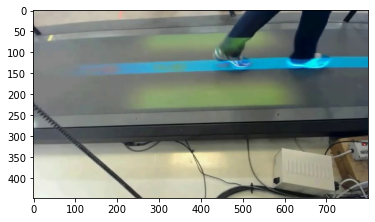

In [143]:
process_openpose(im_path, output_path)

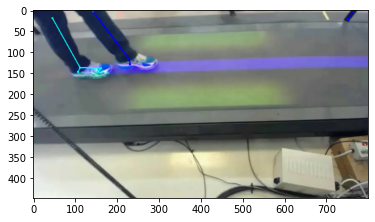

In [13]:
params = dict()
params["model_folder"] = dir_path+"\\..\\models\\"
params["number_people_max"] = 5
params["maximize_positives"] = True
# params["render_threshold"] = 0.1
# params["blendOriginalFrame"] = True

# Starting OpenPose
opWrapper = op.WrapperPython()
opWrapper.configure(params)
opWrapper.start()

im = cv2.imread(im_path)

# Process Image
datum = op.Datum()
datum.cvInputData = im
opWrapper.emplaceAndPop([datum])

# Display Image
RGBOutputData = cv2.cvtColor(datum.cvOutputData, cv2.COLOR_BGR2RGB)
plt.imshow(RGBOutputData)
# plt.savefig(output_path, dpi = 550)

body_keypoints = datum.poseKeypoints

In [11]:
opWrapper

In [14]:
body_keypoints

array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [4.56493149e+01, 1.87905045e+01, 3.13651323e-01],
        [1.11505035e+02, 1.37121735e+02, 3.60039294e-01],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.000